In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# # Dit df omzetten naar een csv:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html?highlight=csv#pandas.DataFrame.to_csv
# # pd.healthData.to_csv(healthDataCsv)
# healthData.to_csv('healthData.csv')


In [3]:
#Read csv file
# lsd = LifeStyleData
lsd = pd.read_csv('lsdata230308.csv')


## Betekenis van de data: 

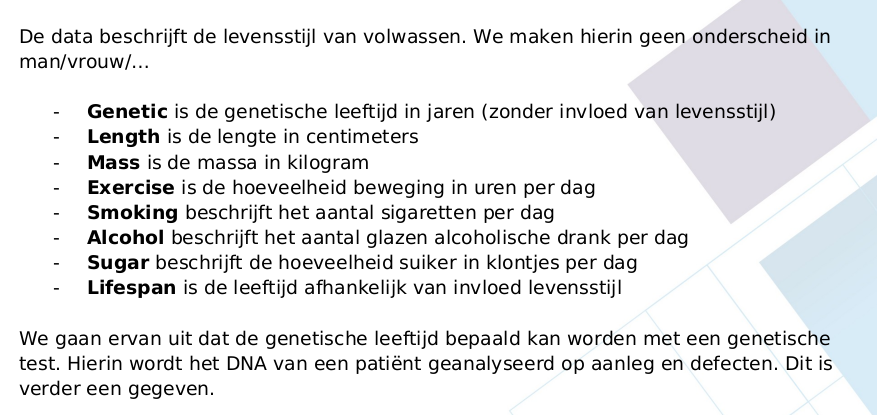

## Exploratory Data Analysis

In [4]:
lsd.head()

genetic length   mass exercise  smoking alcohol sugar  lifespan
0    73.9    185   99.7      0.9      0.0     2.4   6.9      73.1
1    86.0    172  105.4      1.8      8.1     0.4   4.2      85.0
2    83.3    176  111.4      1.1      0.8     4.6   7.5      81.6
3    82.8    164  111.4      4.7     11.8     1.0   2.9      81.0
4    78.7    178   71.6      1.5      8.3     4.9   5.5      75.0

In [5]:
lsd.tail()

genetic length   mass exercise  smoking alcohol sugar  lifespan
4091    80.3    176  115.9      3.7      0.1     5.6   5.8      80.7
4092    75.3    162  129.6      3.6      6.2     5.6   7.6      71.1
4093    93.1    189  115.3      2.7      9.4     4.9   6.6      90.0
4094    77.9    170   90.8      2.3     13.2     0.8   6.2      75.9
4095   101.3    188  129.2      1.2      8.2     6.0   6.2      96.9

In [6]:
lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4096 non-null   object 
 1   length    4096 non-null   object 
 2   mass      4096 non-null   object 
 3   exercise  4096 non-null   object 
 4   smoking   4096 non-null   float64
 5   alcohol   4096 non-null   object 
 6   sugar     4096 non-null   object 
 7   lifespan  4096 non-null   float64
dtypes: float64(2), object(6)
memory usage: 256.1+ KB


In [7]:
lsd.describe()

smoking     lifespan
count  4096.000000  4096.000000
mean      9.807446    80.127783
std       6.921461     8.042270
min       0.000000    -1.000000
25%       3.300000    75.000000
50%       9.500000    79.700000
75%      15.900000    85.200000
max      22.200000   105.100000

There are 8 columns of numbers that look like floats.  
However, of 6 of those columns, the Dtype is an object (possibly a string).  
First action = Convert Dtype of the six columns to floats, or Nans (depending on what I encounter)  
There are no NaN-values


## Objects omzetten in floats
- https://pandas.pydata.org/pandas-'genetic': 'float64','genetic': 'float64','genetic': 'float64',docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype  
Cast col1 to int32 using a dictionary:  
df.astype({'col1': 'int32'}).dtypes  
__My solution:__
- lsd.astype({'genetic': 'float64', 'length': 'float64','mass': 'float64','exercise': 'float64','alcohol': 'float64','sugar': 'float64',}).dtypes  
-  Unfortunately this results in an error: " could not convert string to float: '?' "  
- So apparently there is/are (a) questionmark(s) in the df.  
- The plan is to replace the question marks for a nan and then use dropna() - that is: if it is only a insignificant amount of rows that will be discarded of. I expect that then the Dtype of the column will either automatically convert to float, or the dtype will still convert easily.


In [8]:
qm = ['?']
display(lsd.isin(qm).sum())
display(lsd.shape)
# There are only 7 (out of 4096) rows with a questionmark. I'll discard of them.

genetic     1
length      0
mass        2
exercise    1
smoking     0
alcohol     2
sugar       1
lifespan    0
dtype: int64

(4096, 8)

Where exactly are those questionmarks? First I found them by repeating the same query (m.m.).

In [9]:
#lsd.select_dtypes(include=['object'])

lsd.query("mass == '?'") 
# op regel 3398 staat bij 'genetic'een vraagteken
# in de kolom 'lenght' staat geen vraagteken
# in de kolom 'mass' vraagtekens op regels 2721 en 4027
# in de kolom 'exercise' vraagteken in regel 2576
# in de kolom 'smoking' geen vraagtekens 
# in de kolom 'alcohol' vraagtekens in de regels 947 en 2354
# in de kolom 'sugar' vraagteken in regel 2793
# in de kolom 'lifespan' geen vraagteken 

genetic length mass exercise  smoking alcohol sugar  lifespan
2721    88.9    179    ?      3.1      0.2     0.5   5.1      91.5
4027    67.3    180    ?      1.6      0.0     0.4   5.3      67.9

In [10]:
#colNmsList['genetic','mass','exercise','alcohol','sugar']
#lsd = lsd.drop( lsd.query("sugar =='?' ").index)
#display(lsd.shape)
# Nu handmatig bij alle kolommen het vraagteken verwijderd. Dat moet handiger kunnen. Uitzoeken hoe. Je zou denken dat je een lijst afloopt met de namen van de  kolommen waarin een vraagteken staat en vervolgens een drop-actie afloopt.

In [11]:
#lsd.query("mass == '?'") 

In [12]:
# lsd['genetic'] = pd.to_numeric(lsd['genetic'], errors='coerce')
# lsd['length'] = pd.to_numeric(lsd['length'], errors='coerce')
# lsd['mass'] = pd.to_numeric(lsd['mass'], errors='coerce')
# lsd['exercise'] = pd.to_numeric(lsd['exercise'], errors='coerce')
# lsd['alcohol'] = pd.to_numeric(lsd['alcohol'], errors='coerce')
# lsd['sugar'] = pd.to_numeric(lsd['sugar'], errors='coerce')

# lsd = pd.to_numeric(lsd['genetic', 'length', 'mass', 'exercise', 'alcolhol','sugar' ], errors='coerce')

# display(lsd.astype('float64').dtypes)
# display(lsd.shape)


I have tried or investigated many things (such as 'replace', 'where', 'mask'), but with no desired result.  
Finally, with the help of stackoverflow and Ruud, I arrived at the following: 

In [13]:
# https://stackoverflow.com/questions/38185688/select-rows-containing-certain-values-from-pandas-dataframe
qm = lsd[(lsd == '?').any(axis=1)]
display(qm)

print()
indexqm = lsd[(lsd == '?').any(axis=1)].index
display(indexqm) # check: only 7 rows
print()
lsd2 = lsd.drop(indexqm).copy() # drop the rows and create a new df
display(lsd2.shape) # check the shape of my new df
print()
indexqm2 = lsd2[(lsd2 == '?').any(axis=1)].index
display(indexqm2) # check: must return an empty list

genetic length   mass exercise  smoking alcohol sugar  lifespan
947     82.0    193   68.0      1.3     17.2       ?   1.2      75.3
2354    74.8    183  123.2      2.3     13.8       ?   8.1      70.4
2576    76.4    174   90.9        ?     21.7     0.4   3.7      71.0
2721    88.9    179      ?      3.1      0.2     0.5   5.1      91.5
2793    78.0    178   71.9      1.3      0.1     4.1     ?      77.4
3398       ?    204   72.0      1.0      9.9     0.4   5.4      83.0
4027    67.3    180      ?      1.6      0.0     0.4   5.3      67.9

Int64Index([947, 2354, 2576, 2721, 2793, 3398, 4027], dtype='int64')

(4089, 8)

Int64Index([], dtype='int64')

In [14]:
lsd2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4089 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4089 non-null   object 
 1   length    4089 non-null   object 
 2   mass      4089 non-null   object 
 3   exercise  4089 non-null   object 
 4   smoking   4089 non-null   float64
 5   alcohol   4089 non-null   object 
 6   sugar     4089 non-null   object 
 7   lifespan  4089 non-null   float64
dtypes: float64(2), object(6)
memory usage: 287.5+ KB


Tried again to convert the Dtypes:  
lsd2.astype({'genetic': 'float64', 'length': 'float64','mass': 'float64','exercise': 'float64','alcohol': 'float64','sugar': 'float64',}).dtypes  
Gives again a value error: ValueError: could not convert string to float: 'undefined'

In [15]:
# locate and drop 'undefined'
ud = lsd2[(lsd2 == 'undefined').any(axis=1)]
display(ud)

print()
indexud = lsd2[(lsd2 == 'undefined').any(axis=1)].index
display(indexud) # check: only 3 rows
print()
lsd3 = lsd2.drop(indexud).copy() # drop the rows and create a new df
display(lsd3.shape) # check the shape of my new df
print()
indexud3 = lsd3[(lsd3 == 'undefined').any(axis=1)].index
display(indexud3) # check: must return an empty list

genetic     length   mass exercise  smoking alcohol sugar  lifespan
1038    81.5  undefined  100.2      2.5      8.9     1.3   7.9      81.2
1861    76.7  undefined  115.9      1.1      4.8     3.1   2.9      74.4
3043    66.7  undefined   74.0      2.4      0.1     2.0  10.5      67.6

Int64Index([1038, 1861, 3043], dtype='int64')

(4086, 8)

Int64Index([], dtype='int64')

In [16]:
lsd3.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4086 non-null   object 
 1   length    4086 non-null   object 
 2   mass      4086 non-null   object 
 3   exercise  4086 non-null   object 
 4   smoking   4086 non-null   float64
 5   alcohol   4086 non-null   object 
 6   sugar     4086 non-null   object 
 7   lifespan  4086 non-null   float64
dtypes: float64(2), object(6)
memory usage: 287.3+ KB


In [17]:
# lsd3.astype({'genetic': 'float64', 'length': 'float64','mass': 'float64','exercise': 'float64','alcohol': 'float64','sugar': 'float64',}).dtypes 
# Code above has no result!! Object-columns remain object-columns. Why?

lsd4= lsd3


In [18]:
#https://stackoverflow.com/questions/62274461/converting-all-columns-of-dtype-object-to-float-in-python-pandas
s = lsd4.select_dtypes(include='object').columns
lsd4[s] = lsd4[s].astype("float")

In [19]:
display(lsd4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4086 non-null   float64
 1   length    4086 non-null   float64
 2   mass      4086 non-null   float64
 3   exercise  4086 non-null   float64
 4   smoking   4086 non-null   float64
 5   alcohol   4086 non-null   float64
 6   sugar     4086 non-null   float64
 7   lifespan  4086 non-null   float64
dtypes: float64(8)
memory usage: 287.3 KB


None

In [20]:
lsd4.to_csv('lsdata230309.csv', index = False)

### Another solution, to be found here (and used in another group):   

https://stackoverflow.com/questions/15891038/change-column-type-in-pandas  
lsd['genetic'] = pd.to_numeric(lsd['genetic'], errors='coerce')  
lsd['length'] = pd.to_numeric(lsd['length'], errors='coerce')  
lsd['mass'] = pd.to_numeric(lsd['mass'], errors='coerce')  
lsd['exercise'] = pd.to_numeric(lsd['exercise'], errors='coerce')  
lsd['alcohol'] = pd.to_numeric(lsd['alcohol'], errors='coerce')  
lsd['sugar'] = pd.to_numeric(lsd['sugar'], errors='coerce')  
  
  
display(lsd.astype('float64').dtypes)  
display(lsd.shape)

### I will use this in my pipeline since it is more generic & robust:
Or, more sophisticated and robust:  
for n in df.keys():  
> df[n] = pd.to_numeric(df[n], errors='coerce')





### Data Cleaning solution used in my team: 
de csv opnieuw inlezen met een correctie voor de vraagtekens en de cellen met de tekst 'undefined'.  
lsd = pd.read_csv('lsdata230308.csv', na_values=["?", "undefined"])

# You will find my EDA proces in my notebook EDA_lsData.ipynb
